<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


# **Predicción de aterrizaje de la primera etapa del SpaceX Falcon 9**


## Tarea: Exploración y Preparación de Datos


Tiempo estimado necesario: **70** minutos



En esta tarea, predeciremos si la primera etapa del Falcon 9 aterrizará con éxito. SpaceX anuncia los lanzamientos del cohete Falcon 9 en su sitio web con un costo de 62 millones de dólares; otros proveedores tienen un costo de al menos 165 millones de dólares cada uno, y gran parte del ahorro se debe al hecho de que SpaceX puede reutilizar la primera etapa.

En este laboratorio, realizarás un Análisis Exploratorio de Datos e Ingeniería de Características.

La primera etapa del Falcon 9 aterrizará con éxito.


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/landing_1.gif)



Se muestran varios ejemplos de aterrizajes fallidos aquí:

![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/crash.gif)


La mayoría de los aterrizajes fallidos están planeados. SpaceX realiza aterrizajes controlados en los océanos.

## Objetivos
Realizar Análisis Exploratorio de Datos e Ingeniería de Características utilizando `Pandas` y `Matplotlib`

- Análisis Exploratorio de Datos
- Preparación de Datos y Creación de Características


----


### Importar Bibliotecas y Definir Funciones Auxiliares


Importaremos las siguientes bibliotecas en el laboratorio.



In [1]:
# Pandas es una biblioteca de software escrita para el lenguaje de programación Python para la manipulación y análisis de datos.
import pandas as pd
# NumPy es una biblioteca para el lenguaje de programación Python que agrega soporte para matrices y matrices multidimensionales grandes, junto con una gran colección de funciones matemáticas de alto nivel para operar en estas matrices.
import numpy as np
# Matplotlib es una biblioteca de gráficos para Python y pyplot nos brinda un marco de trabajo de trazado similar a MatLab. Lo utilizaremos en nuestra función de trazado para representar datos.
import matplotlib.pyplot as plt
# Seaborn es una biblioteca de visualización de datos de Python basada en matplotlib. Proporciona una interfaz de alto nivel para dibujar gráficos estadísticos atractivos e informativos.
import seaborn as sns


## Análisis Exploratorio de Datos


Primero, vamos a leer el conjunto de datos de SpaceX en un dataframe de Pandas y mostrar su resumen.


In [2]:
# Lee el conjunto de datos de SpaceX desde un archivo CSV y carga los primeros 5 registros
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv")

# Si no pudiste completar correctamente el laboratorio anterior, puedes descomentar y cargar este archivo CSV
# df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/dataset_part_2.csv')

df.head(5)


,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


Primero, intentemos ver cómo las variables `FlightNumber` (que indica los intentos de lanzamiento continuos) y `Payload` afectarían el resultado del lanzamiento.

Podemos representar gráficamente el <code>FlightNumber</code> vs. <code>PayloadMass</code> y superponer el resultado del lanzamiento. Observamos que a medida que aumenta el número de vuelo, es más probable que la primera etapa aterrice con éxito. La masa de la carga útil también es importante; parece que cuanto más masiva es la carga útil, menos probable es que la primera etapa regrese.


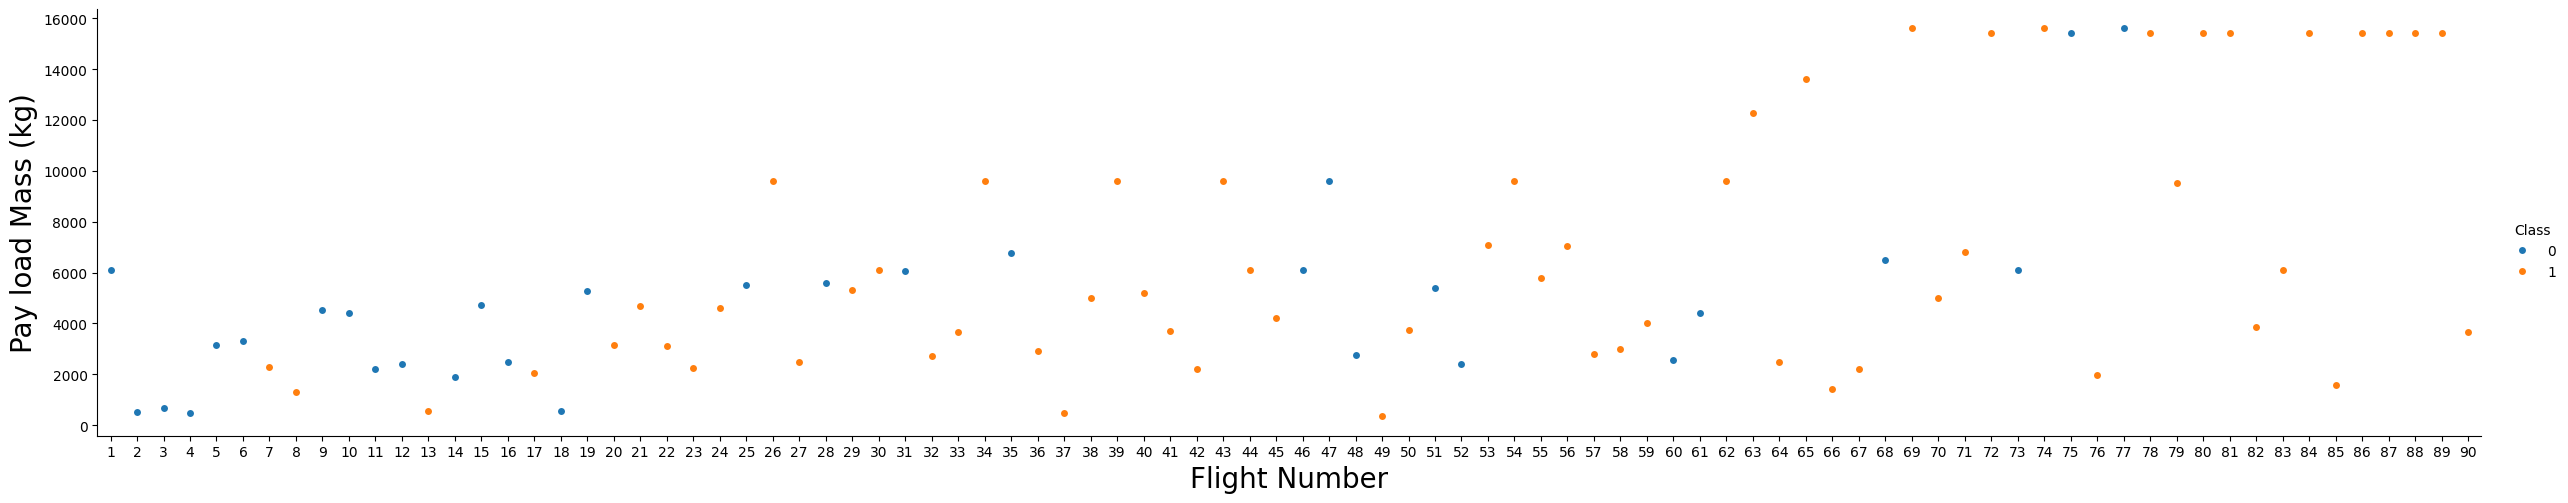

In [3]:
sns.catplot(y="PayloadMass", x="FlightNumber", hue="Class", data=df, aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Pay load Mass (kg)",fontsize=20)
plt.show()

Vemos que diferentes sitios de lanzamiento tienen tasas de éxito diferentes. CCAFS LC-40 tiene una tasa de éxito del 60%, mientras que KSC LC-39A y VAFB SLC 4E tienen una tasa de éxito del 77%.

A continuación, profundicemos en cada sitio para visualizar sus registros de lanzamiento detallados.


### TAREA 1: Visualizar la relación entre el número de vuelo y el sitio de lanzamiento


Usa la función <code>catplot</code> para graficar <code>FlightNumber</code> vs <code>LaunchSite</code>. Configura el parámetro <code>x</code> en <code>FlightNumber</code>, el <code>y</code> en <code>Launch Site</code> y el parámetro <code>hue</code> en <code>'class'</code>.


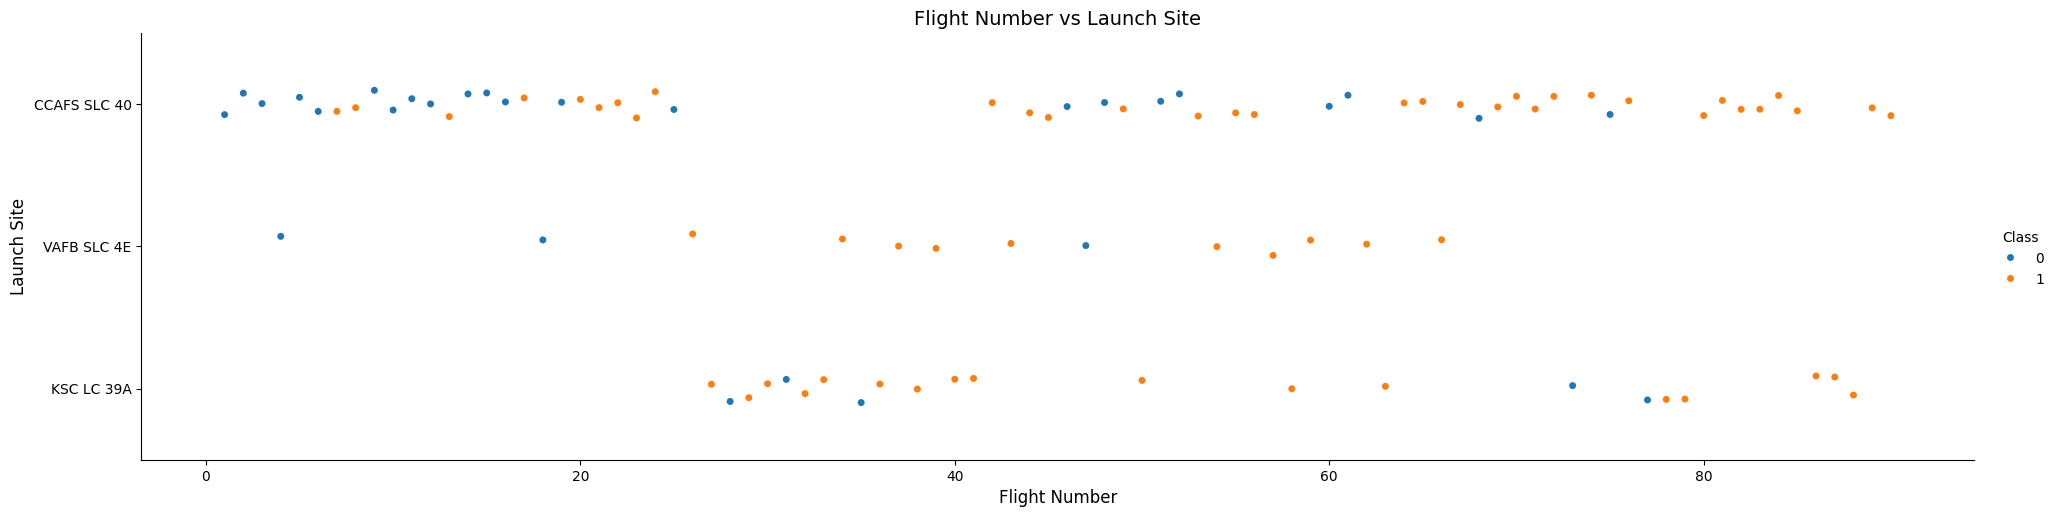

In [4]:
# Gráfica un diagrama de dispersión con el eje x representando el número de vuelo, el eje y representando el sitio de lanzamiento y el tono (hue) representando los valores de clase.
sns.catplot(y="LaunchSite", x="FlightNumber", hue="Class", data=df, aspect=4)
plt.xlabel("Flight Number", fontsize=12)
plt.ylabel("Launch Site", fontsize=12)
plt.title("Flight Number vs Launch Site", fontsize=14)
plt.show()



Intenta explicar ahora los patrones que encontraste en los gráficos de dispersión de número de vuelo vs. sitio de lanzamiento.


### TAREA 2: Visualizar la relación entre la carga útil y el sitio de lanzamiento


También queremos observar si hay alguna relación entre los sitios de lanzamiento y la masa de la carga útil.


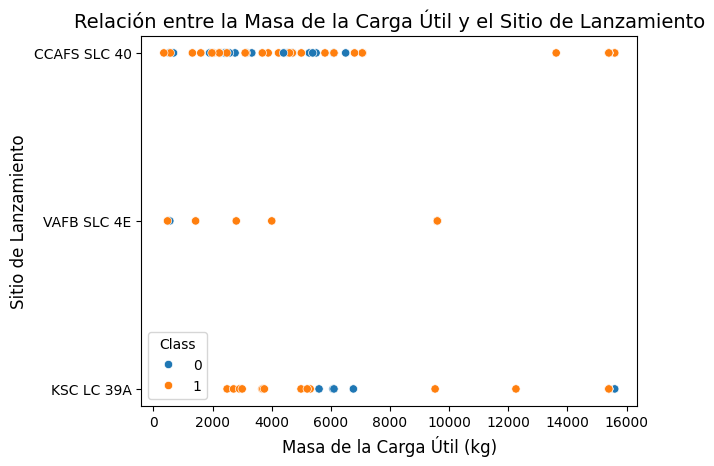

In [5]:
# Graficar un diagrama de dispersión con el eje x siendo la masa de la carga útil (kg), el eje y siendo el sitio de lanzamiento y el matiz siendo el valor de la clase
sns.scatterplot(x="PayloadMass", y="LaunchSite", hue="Class", data=df)
plt.xlabel("Masa de la Carga Útil (kg)", fontsize=12)
plt.ylabel("Sitio de Lanzamiento", fontsize=12)
plt.title("Relación entre la Masa de la Carga Útil y el Sitio de Lanzamiento", fontsize=14)
plt.show()



Ahora, si observas el gráfico de dispersión de Carga útil vs. Sitio de lanzamiento, notarás que para el sitio de lanzamiento VAFB-SLC no hay cohetes lanzados con una carga útil pesada (mayor a 10000 kg).


### TAREA 3: Visualizar la relación entre la tasa de éxito de cada tipo de órbita


A continuación, queremos verificar visualmente si existe alguna relación entre la tasa de éxito y el tipo de órbita.


Creemos un "gráfico de barras" para la tasa de éxito de cada órbita.


In [ ]:
# SUGERENCIA: usa el método groupby en la columna Orbit y obtén la media de la columna Class

```python
orbit_success_rate = df.groupby('Orbit')['Class'].mean().sort_values()
orbit_success_rate.plot(kind='bar', figsize=(10, 6))
plt.title('Tasa de éxito por tipo de órbita')
plt.xlabel('Tipo de órbita')
plt.ylabel('Tasa de éxito')
plt.show()
```


Analyze the ploted bar chart try to find which orbits have high sucess rate.


### TASK  4: Visualize the relationship between FlightNumber and Orbit type


For each orbit, we want to see if there is any relationship between FlightNumber and Orbit type.


In [ ]:
# Plot a scatter point chart with x axis to be FlightNumber and y axis to be the Orbit, and hue to be the class value


You should see that in the LEO orbit the Success appears related to the number of flights; on the other hand, there seems to be no relationship between flight number when in GTO orbit.


### TASK  5: Visualize the relationship between Payload and Orbit type


Similarly, we can plot the Payload vs. Orbit scatter point charts to reveal the relationship between Payload and Orbit type


In [ ]:
# Plot a scatter point chart with x axis to be Payload and y axis to be the Orbit, and hue to be the class value


With heavy payloads the successful landing or positive landing rate are more for Polar,LEO and ISS.   

However for GTO we cannot distinguish this well as both positive landing rate and negative landing(unsuccessful mission) are both there here.




### TASK  6: Visualize the launch success yearly trend


You can plot a line chart with x axis to be <code>Year</code> and y axis to be average success rate, to get the average launch success trend. 


The function will help you get the year from the date:


In [ ]:
# A function to Extract years from the date 
year=[]
def Extract_year(date):
    for i in df["Date"]:
        year.append(i.split("-")[0])
    return year
    

In [ ]:
# Plot a line chart with x axis to be the extracted year and y axis to be the success rate


You can observe that the success rate since 2013 kept increasing till 2017 (stable in 2014) and after 2015 it started increasing.


## Features Engineering 


By now, you should obtain some preliminary insights about how each important variable would affect the success rate, we will select the features that will be used in success prediction in the future module.


In [ ]:
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]
features.head()

 ### TASK  7: Create dummy variables to categorical columns


Use the function <code>get_dummies</code> and <code>features</code> dataframe to apply OneHotEncoder to the column <code>Orbits</code>, <code>LaunchSite</code>, <code>LandingPad</code>, and <code>Serial</code>. Assign the value to the variable <code>features_one_hot</code>, display the results using the method head. Your result dataframe must include all features including the encoded ones.


In [ ]:
# HINT: Use get_dummies() function on the categorical columns


### TASK  8: Cast all numeric columns to `float64`


Now that our <code>features_one_hot</code> dataframe only contains numbers cast the entire dataframe to variable type <code>float64</code>


In [ ]:
# HINT: use astype function


We can now export it to a <b>CSV</b> for the next section,but to make the answers consistent, in the next lab we will provide data in a pre-selected date range. 


<code>features_one_hot.to_csv('dataset_part_3.csv', index=False)</code>


## Authors


<a href="https://www.linkedin.com/in/joseph-s-50398b136/">Joseph Santarcangelo</a> has a PhD in Electrical Engineering, his research focused on using machine learning, signal processing, and computer vision to determine how videos impact human cognition. Joseph has been working for IBM since he completed his PhD.


<a href="https://www.linkedin.com/in/nayefaboutayoun/">Nayef Abou Tayoun</a> is a Data Scientist at IBM and pursuing a Master of Management in Artificial intelligence degree at Queen's University.


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By | Change Description      |
| ----------------- | ------- | ---------- | ----------------------- |
| 2021-10-12        | 1.1     | Lakshmi Holla     | Modified markdown |
| 2020-09-20        | 1.0     | Joseph     | Modified Multiple Areas |
| 2020-11-10       | 1.1    | Nayef      | updating the input data |


Copyright © 2020 IBM Corporation. All rights reserved.
